# Test Fish Heterotrophic Nutrient Sector #

Primarily used for debugging and making sure module runs fine on its own.

In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

from aquaponics import Aquaponics

In [2]:
a = Aquaponics('heterotrophic')
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4
m.options.SOLVER = 3

m.solve(disp=False)

Text(0.5,0,'Time (days)')

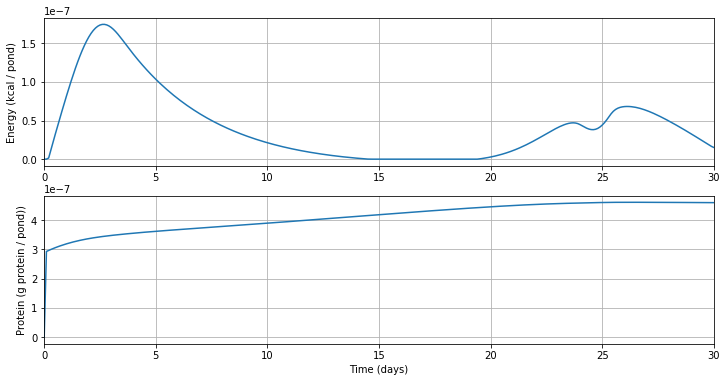

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.title('Heterotrophic Food Quantity')
ax = plt.subplot(211)
plt.plot(m.time, a.HFe)
plt.grid()
plt.ylabel('Energy (kcal / pond)')

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.HFp)
plt.grid()
plt.ylabel('Protein (g protein / pond))')

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Heterotrophic and Autotrophic ##

In [4]:
a = Aquaponics('autotrophic', 'heterotrophic')
m = a.get_model()

tf = 30
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)
m.options.IMODE = 4
m.options.SOLVER = 3

m.solve(disp=False)

Text(0.5,0,'Time (days)')

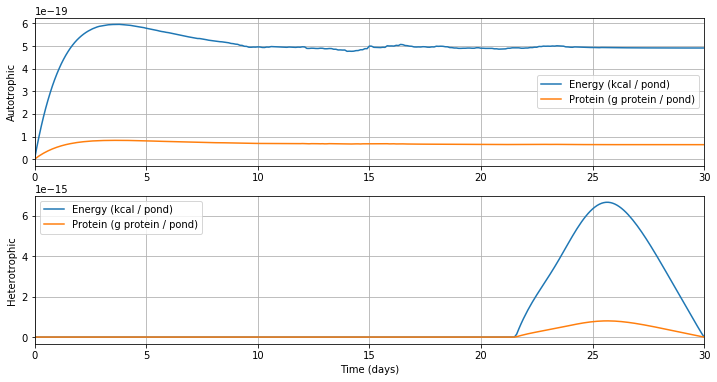

In [5]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.AFe, label='Energy (kcal / pond)')
plt.plot(m.time, a.AFp, label='Protein (g protein / pond)')
plt.grid()
plt.ylabel('Autotrophic')
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.HFe, label='Energy (kcal / pond)')
plt.plot(m.time, a.HFp, label='Protein (g protein / pond)')
plt.grid()
plt.ylabel('Heterotrophic')
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')